In [1]:
!dir

 磁碟區 C 中的磁碟沒有標籤。
 磁碟區序號:  18E0-5F57

 C:\Users\supervisor\巨匠楊老師的第三階段課程\20191103-Capstone\AM 的目錄

2020/06/10  下午 02:42    <DIR>          .
2020/06/10  下午 02:42    <DIR>          ..
2020/06/10  下午 02:08    <DIR>          .ipynb_checkpoints
2019/11/02  下午 08:21           712,281 DAT263x-Lab2.pdf
2019/11/02  下午 08:59           409,412 DAT264x - 20191103 - AM -Final.html
2019/11/02  下午 08:59           126,697 DAT264x - 20191103 - AM -Final.ipynb
2019/11/02  下午 08:42           379,225 DAT264x - 20191103.html
2020/06/10  下午 02:42           139,852 DAT264x - 20191103.ipynb
2019/11/02  下午 08:34               481 DAT264x - 20191103.txt
2020/06/10  下午 02:07             1,589 Moon.txt
2019/10/16  上午 01:57           999,188 submission_format.csv
2019/10/16  上午 01:57       326,681,498 test_values.csv
2020/06/10  下午 02:08            32,589 Text and Speech - Demo.ipynb
2019/10/16  上午 01:56           998,540 train_labels.csv
2020/06/10  下午 01:22         1,084,185 train_label_analysis.xlsx
2019/10/16  上

In [2]:
# 套件
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re
from string import punctuation

In [3]:
# 讀取 train data
train = pd.read_csv('train_values.csv')
train_label = pd.read_csv('train_labels.csv')

In [4]:
# 0 - 18686
train.shape , train_label.shape # 筆數正確

((18687, 2), (18687, 25))

In [5]:
# 檢視數據
train['doc_text'][0]

train.loc[0, ['doc_text']]

train.iloc[0, 1]

'84327 v2\nThe findings, interpretations, and conclusions expressed in this report do not\nnecessarily reflect the views and position of the Executive Directors of the\nWorld Bank, the European Union, or the Government of Romania.\nTABLE OF CONTENTs                                                                                                           Table of Contents\nList of Abbreviations ........................................................................................         7\n\nRomanias growth poles policy has shaped an important part of the\ncountrys development in recent years .........................................................                        9\n\nThe current growth poles policy includes several positive features .......                                             11\n                                                                                                                             3 Policies adapted to the expected evolution of growth poles ...

In [6]:
# 檢視答案 回到 python計算 想知道 每一種類數量是多少 看數據是否平衡
train_label.iloc[:, 1:].columns

Index(['information_and_communication_technologies', 'governance',
       'urban_development', 'law_and_development', 'public_sector_development',
       'agriculture', 'communities_and_human_settlements',
       'health_and_nutrition_and_population', 'culture_and_development',
       'social_protections_and_labor', 'international_economics_and_trade',
       'conflict_and_development', 'science_and_technology_development',
       'rural_development', 'poverty_reduction', 'social_development',
       'education', 'transport', 'gender',
       'infrastructure_economics_and_finance', 'energy_and_environment',
       'finance_and_development', 'macroeconomics_and_growth', 'water'],
      dtype='object')

In [7]:
# 知道每一種類數量是多少 看數據是否平衡
# ModuleNotFoundError: No module named 'openpyxl'
train_label.iloc[:, 1:].to_excel('train_label_analysis.xlsx')

In [8]:
# 知道每一種類數量是多少 看數據是否平衡
np.sum(train_label.iloc[:, 1:], axis = 0).sort_values()

culture_and_development                        306
infrastructure_economics_and_finance           335
information_and_communication_technologies     784
conflict_and_development                       819
science_and_technology_development             875
gender                                        1066
agriculture                                   1174
urban_development                             1395
transport                                     1542
communities_and_human_settlements             1607
social_development                            1614
water                                         1619
governance                                    1663
rural_development                             1793
social_protections_and_labor                  2290
education                                     2323
law_and_development                           2418
international_economics_and_trade             2419
poverty_reduction                             2580
public_sector_development      

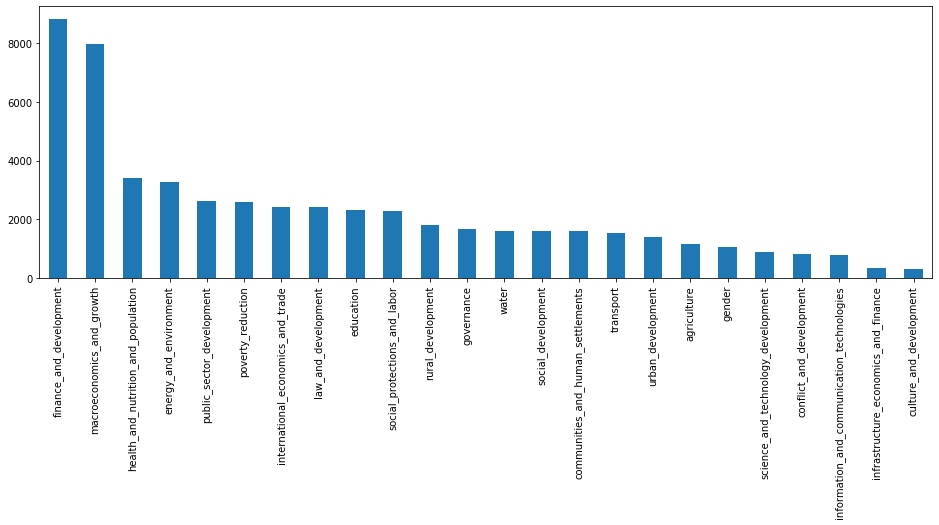

In [9]:
# 知道每一種類數量是多少 看數據是否平衡
plt.figure(figsize=(16,5))
np.sum(train_label.iloc[:, 1:], axis = 0).sort_values(ascending=False).plot(kind='bar')
plt.show()

In [10]:
# 不移除之前
train.loc[0, ['doc_text']].values[0]

'84327 v2\nThe findings, interpretations, and conclusions expressed in this report do not\nnecessarily reflect the views and position of the Executive Directors of the\nWorld Bank, the European Union, or the Government of Romania.\nTABLE OF CONTENTs                                                                                                           Table of Contents\nList of Abbreviations ........................................................................................         7\n\nRomanias growth poles policy has shaped an important part of the\ncountrys development in recent years .........................................................                        9\n\nThe current growth poles policy includes several positive features .......                                             11\n                                                                                                                             3 Policies adapted to the expected evolution of growth poles ...

In [11]:
#  移除不需要的文字
cleaned_text = train.loc[0, ['doc_text']].values[0].replace(',','').replace('.','').replace('\n',' ').replace('  ',' ').replace('  ',' ').replace('  ',' ').replace('  ',' ').replace('  ',' ').replace('  ',' ').replace('  ',' ').replace('  ',' ').replace('  ',' ').lower()
pd.Series(cleaned_text.split()).value_counts()


the            30
of             28
growth         20
poles          18
development    14
               ..
boundaries      1
socialist       1
idas            1
643%            1
&               1
Length: 403, dtype: int64

In [12]:
# 了解數據之後 接下來就要針對文字 進行 斷詞切字
pd.Series(train.loc[0, ['doc_text']].values.tolist()[0].split()).value_counts()

of        27
the       26
growth    17
poles     13
and       12
          ..
8          1
25.6%      1
IDAs       1
2008,      1
&          1
Length: 451, dtype: int64

In [13]:
# 發現上述都有stop words 佔據前面幾名 the of this that 要移除
# 請安裝nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\supervisor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
" ".join([w for w in cleaned_text.split() if w not in stop])

'84327 v2 findings interpretations conclusions expressed report necessarily reflect views position executive directors world bank european union government romania table contents table contents list abbreviations 7 romanias growth poles policy shaped important part countrys development recent years 9 current growth poles policy includes several positive features 11 3 policies adapted expected evolution growth poles 25 hand current growth poles policy shortcomings 13 4 planning growth poles beyond defined metropolitan boundaries based areas economic growth potential 27 new urban systems approach romania currently prepared dg regional development within ministry regional 5 truly integrated programs 27 development public administration (mrdpa) 15 several recommendations worth considering future 6k eep number growth poles (if regions stay same) consider different number urban development poles 29 growth poles policy (2014-2020) 17 equally important rather targeting public investments 7 con

In [19]:
pd.Series([w for w in cleaned_text.split() if w not in stop]).value_counts  #第一名為growth

growth         20
poles          18
development    14
urban           8
regional        8
               ..
84327           1
government      1
living          1
148%            1
53%             1
Length: 367, dtype: int64

In [15]:
list(stopwords.words("english"))  #不重要的字

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
# 請再移除數字 標點符號 
# from string import punctuation
# txt2 = ''.join(c for c in doc2Txt if not c.isdigit())
# txt2 = ''.join(c for c in txt2 if c not in punctuation).lower()
# txt2 = ' '.join([word for word in txt2.split() if word not in (stopwords.words('english'))])

In [132]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
txt = ' '.join([w for w in cleaned_text.split() if w not in stop])
txt = ' '.join([c for c in txt.split() if not c.isdigit()])
txt = ' '.join([c for c in txt.split() if c not in punctuation])
pd.Series([w for w in txt.split() if w not in stop]).value_counts()
#txt 拔掉Stop , isdigit(),punctuation

growth         20
poles          18
development    14
urban           8
regional        8
               ..
living          1
government      1
driven          1
information     1
53%             1
Length: 294, dtype: int64

In [23]:
# 必較前後落差
print(train.loc[0]['doc_text']),
print(' '.join([w for w in cleaned_text.split() if w not in stop]))

84327 v2
The findings, interpretations, and conclusions expressed in this report do not
necessarily reflect the views and position of the Executive Directors of the
World Bank, the European Union, or the Government of Romania.
TABLE OF CONTENTs                                                                                                           Table of Contents
List of Abbreviations ........................................................................................         7

Romanias growth poles policy has shaped an important part of the
countrys development in recent years .........................................................                        9

The current growth poles policy includes several positive features .......                                             11
                                                                                                                             3 Policies adapted to the expected evolution of growth poles ...............

In [22]:
# 必較前後
print(train.loc[0]['doc_text'])

84327 v2
The findings, interpretations, and conclusions expressed in this report do not
necessarily reflect the views and position of the Executive Directors of the
World Bank, the European Union, or the Government of Romania.
TABLE OF CONTENTs                                                                                                           Table of Contents
List of Abbreviations ........................................................................................         7

Romanias growth poles policy has shaped an important part of the
countrys development in recent years .........................................................                        9

The current growth poles policy includes several positive features .......                                             11
                                                                                                                             3 Policies adapted to the expected evolution of growth poles ...............